![example](images/director_shot.jpeg)

# A genre study

**Author:** Maria Kuzmin
***

## Overview

The goal of this study is to better understand how Microsoft can enter into the movie industry with maximum potential to succeed in profitability based on real world data.
The data is sourced from 5 major websites that give relevant monetary and release information concerning thousands of movies. The data demonstrates that 5 specific genres are more profitable. Also, the data showed that specific months of the year to release the movies is critical.


## Business Problem

To enter into the movie industry, Microsoft would need to have a clear path of entry that takes into account a series of factors based on the evidence of previous movies that proved to be successful and profitable. After researching about the most profitable movies (specifically [Hollywood_reporter](https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/), [Business_insider](https://www.businessinsider.com/highest-grossing-movies-all-time-worldwide-box-office-2018-4), [Statista](https://www.statista.com/statistics/262926/box-office-revenue-of-the-most-successful-movies-of-all-time/)), it became clear that certain genres tend to be more profitable than others, and therefore it was key to investigate if this was true or not based on real data. The key questions that need to be answered to effectively have a business plan are:

- What movie genres have the highest gross income?
- Which ones have the lowest budgets?
- Which movies provide the highest retun on investment?

And once the top genres are clear:
- What makes a movie profitable?
- What are the parameters that we can choose to try to increase our ROI?

And finally: 
- How much can Microsoft expect to produce as an income on average, and how much would it need to invest in the production budget per movie on average?


## Data Understanding

The data that was provided for this study consists of some tabular files (csv and tsv formats) that were taken by a few websites. Most of them have informations about the movie budget, gross income (domestic and worldwide), number of reviews and average reviews, movie genre and so on.
Another set of data we have is contained in a database (format SQL) that we can extract information from.
Beside the basic information that also the other websites provide, this database contains also the names of directors and writers for the movies, and a list of the people that each movie is known for.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let us start by taking a look at the files that we are going to use, creating DataFrames for them and getting a preview.

## Looking at the data
**TMBD, The movie Database**

In [2]:
df_tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


**The Numbers, Movie budgets**

In [3]:
df_tn=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**IMDB**

This is actually a SQL database so I need to first unzip it and then I can start to query with sqlite3

In [4]:
#unzipping the file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [5]:
import sqlite3

Creating a connection and starting to look at the schema to get a sense of which are the tables in this database:

In [6]:
conn=sqlite3.connect("zippedData/im.db")
schema_df=pd.read_sql("""
SELECT *
FROM sqlite_master
;
""",conn)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now I'm going to create a Dataframe for each table that I am going to use

In [7]:
df_IMDB_moviebasics=pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
df_IMDB_moviebasics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
knownfor_df=pd.read_sql("""
SELECT *
FROM movie_basics
JOIN known_for
    USING (movie_id)
;
""",conn)

In [9]:
persons_df=pd.read_sql("""
SELECT *
FROM persons
;
""",conn)

## Data Preparation

Preparing the data was key prior to reaching any conclusions. 
First, I had to convert the type of some of the data, that represented numbers but was in the format of strings. 

Second, in order to identify the genre of the movies I had to split the string that describes the genre and convert that into a list, to be able to use the .explode() method to separate the movies that have multiple genres.

Third, I deleted the missing values that were present since there were only a few movies without a genre and compared to the number of entries I have the NaN values seemed negligible.

Fourth, I decided not to remove the outliers yet, since there is something that we can learn from the movie with the highest income or lowest budget.

However, I did decide to remove them for the last step of the analysis, when calculating the averages of budget and gross.
***
I am going to conduct a study about the movies gross and production budget, and I will do so by working on the DataFrame from "The Numbers". I will need to subtract the budget from the gross, but I need to make sure that the values are of float type to do that.

In [10]:
type(df_tn['domestic_gross'][0])

str

In [11]:
type(df_tn['production_budget'][0])

str

Since the types of the columns that I need to compute are strings I need to first convert them to floats.

In [12]:
""" First removing the dollar sign. """
df_tn['domestic_gross']=df_tn['domestic_gross'].str.strip('$')
df_tn['production_budget']=df_tn['production_budget'].str.strip('$')
df_tn['worldwide_gross']=df_tn['worldwide_gross'].str.strip('$');


In [13]:
""" Replacing the , which make it impossible to convert to float. """
df_tn['domestic_gross']=(df_tn['domestic_gross']).str.replace(",","")
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).str.replace(",","")
df_tn['production_budget']=(df_tn['production_budget']).str.replace(",","")

In [14]:
""" Finally converting to float. """
df_tn['domestic_gross']=df_tn['domestic_gross'].apply(float)
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).apply(float)
df_tn['production_budget']=(df_tn['production_budget']).apply(float)

Now that I converted to floats I can convert the values to millions, for a better readability, and I can calculate the domestic and worldwide net, subtracting the budget from the incomes.

In [15]:
df_tn['domestic_gross']=df_tn['domestic_gross']/1000000
df_tn['worldwide_gross']=df_tn['worldwide_gross']/1000000
df_tn['production_budget']=df_tn['production_budget']/1000000

In [16]:
df_tn['domestic_net']=df_tn['domestic_gross']-df_tn['production_budget']
df_tn['worldwide_net']=df_tn['worldwide_gross']-df_tn['production_budget']

In [17]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747


In order to continue with my analysis I need to decide what to do with NaN values that could create problems. First I am going to check how many there are, to then decide how to proceed with data cleaning.

In [18]:
df_tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
domestic_net         0
worldwide_net        0
dtype: int64

Nice! No null values.
Now getting my IMDB DataFrame with movie basics and ratings, since I want to study the genre and the reviews.

In [19]:
df_IMDB=pd.read_sql("""
SELECT movie_id, primary_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
;
""",conn)
df_IMDB.head(10)

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Drama,6.8,451
8,tt0154039,So Much for Justice!,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,53


In [20]:
df_IMDB.isna().sum() # checking for null values

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [21]:
df_IMDB.shape # comparing with the total size of the DataFrame

(73856, 5)

Considering the small amount of null values it is reasonable to simply drop them.

In [22]:
df_IMDB.dropna(inplace=True);

Checking for null values in the last DataFrame

In [23]:
df_tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Next I want to merge the two DataFrames:

In [24]:
df_IMDB=df_IMDB.rename(columns={'primary_title':'movie'}) #renaming the column to merge
main_df=pd.merge(df_tn, df_IMDB,on='movie',how='inner')
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875,tt1298650,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650,tt6565702,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200,378.815482,1748.134200,tt4154756,"Action,Adventure,Sci-Fi",8.5,670926


Let us check what is the size of our final DataFrame to get a sense of how many values we are working with.

In [25]:
main_df.shape

(2867, 12)

Since I want to study the movies based on their genre let me take a look at what are the values associated with genres in this DataFrame.

In [26]:
main_df['genres'].value_counts()

Drama                    319
Documentary              126
Comedy                   108
Comedy,Drama              93
Drama,Romance             77
                        ... 
Drama,Family,History       1
Animation,Horror           1
Adventure,Drama,Sport      1
Comedy,Crime,Horror        1
Drama,History,Romance      1
Name: genres, Length: 311, dtype: int64

The problem we have here is that many movies have listed more then one gerne.
That makes it complicated to group by genre and draw conclusions on a specific genre because with this format "Comedy, Drama" results as ist own genre, instead of being listed as a movie that pertains to both genres.

To be able to continue in my study I am going to have to separate all those gernes, and have a new DataFrame in which every listed movie has only one corrsponding genre (and movies with two listed genres will appear twice etc).

The first step is to separate the string of the genre into a list with the separate genres, and I do this by creating a function:

In [27]:
def Convert(string):
    li = list(string.split(","))
    return li

And then applying that function to the genre column of the DataFrame:

In [28]:
main_df['genres']=main_df['genres'].map(Convert)

In [29]:
type(main_df['genres'][1])

list

Now I can use the pandas' method `.explode( )` that can separate the different entries for "genre" for a single movie, by creating copies of the same row each with a single genre.

In [30]:
main_df=main_df.explode('genres')

In [31]:
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875,tt1298650,Action,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875,tt1298650,Adventure,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875,tt1298650,Fantasy,6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650,tt6565702,Action,6.0,24451


And now I have my DataFrame ready to work with!

## Data Modeling

With the DataFrame of movies divided by genre I grouped the movies by genre and calculated the average of the numerical values per genre.

In this way I was able to study what on average is the gross income (both worldwide and domestic) per genre. This also allowed me to see what is the budget per genre and some other similar calculations.

Then I selected what I found to be the five genres with highest gross income and highest ROI.

Starting from these five genres, I calculated how many people each movie was known for, and calculated to see if there is a correlation between the number of famous people in a movie and the gross income and production budget.

I also divided the movies by release date to study which are the release months that tend to have the highest gross.

Finally going back to the main database I calculated what is the gross income and budget on average, both considering only movies from the five top genres, and all the movies from all the other genres.
***
Now I need to study... Lets start from gross income vs genre

In [32]:
average_df=main_df.groupby('genres').mean()
average_df.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,averagerating,numvotes
genres,,,,,,,,
Action,49.833333,64.728460,70.931714,190.454041,6.203254,125.725580,6.103810,135457.123810
Adventure,49.015625,91.311973,107.062661,299.994950,15.750688,208.682977,6.400893,168058.022321
Animation,46.846154,85.906071,115.842079,317.646292,29.936007,231.740220,6.482308,99923.807692
Biography,52.215385,25.456659,34.696784,72.312843,9.240125,46.856184,6.971795,80511.994872
Comedy,51.269129,33.425036,47.602498,106.139480,14.177462,72.714444,6.186280,66854.522427


In [33]:
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-notebook')

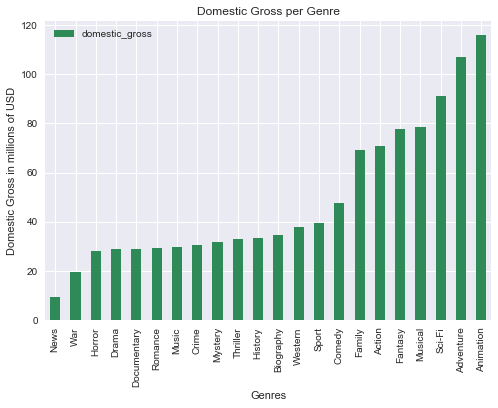

In [34]:
average_df=average_df.sort_values(by=['domestic_gross'])
average_df.plot.bar(y='domestic_gross',color='#2E8B57',title='Domestic Gross per Genre'\
                    , ylabel='Domestic Gross in millions of USD', xlabel='Genres');

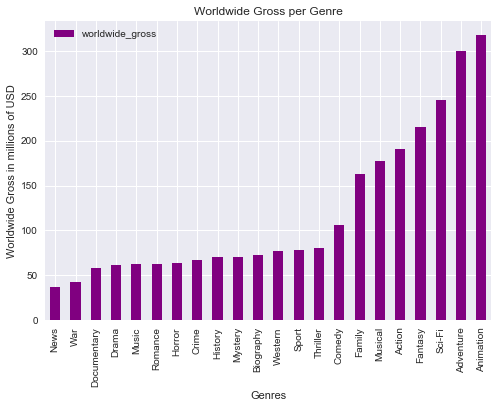

In [35]:
average_df=average_df.sort_values(by=['worldwide_gross'])
average_df.plot.bar(y='worldwide_gross',color='#800080', title='Worldwide Gross per Genre'\
                    , ylabel='Worldwide Gross in millions of USD',xlabel='Genres');
plt.savefig('WWgrossgnr.png')

The five genres with the highest average worldwide gross are Animation, Adventure, Sci-Fi, Fantasy and Action.

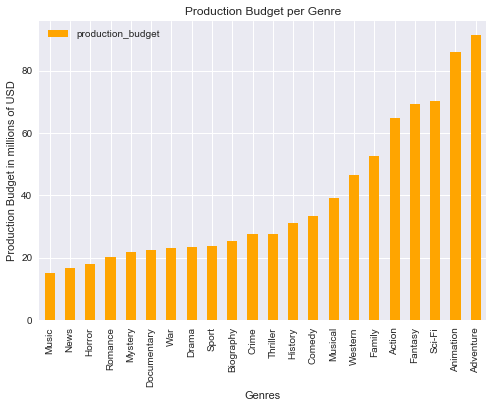

In [36]:
average_df=average_df.sort_values(by=['production_budget'])
average_df.plot.bar(y='production_budget',color='#FFA500',title='Production Budget per Genre', \
                    ylabel='Production Budget in millions of USD',xlabel='Genres');

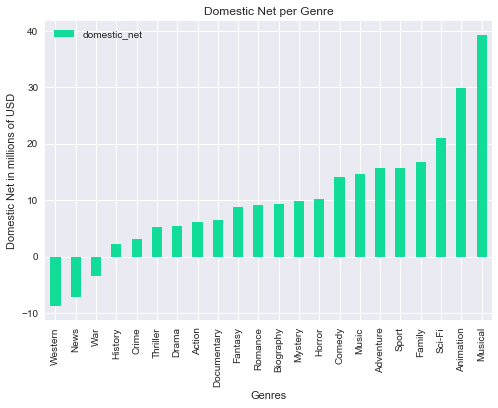

In [37]:
average_df=average_df.sort_values(by=['domestic_net'])
average_df.plot.bar(y='domestic_net',color='#11dd99', title='Domestic Net per Genre', \
                    ylabel='Domestic Net in millions of USD', xlabel='Genres');

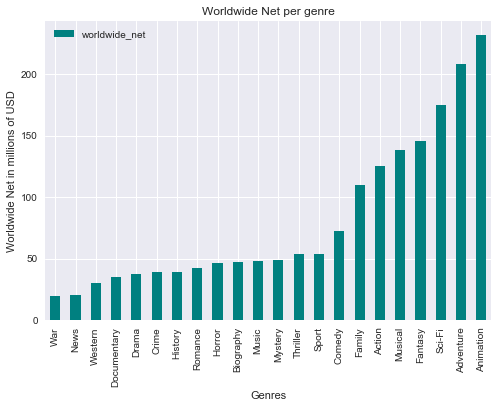

In [38]:
average_df=average_df.sort_values(by=['worldwide_net'])
average_df.plot.bar(y='worldwide_net',color='teal', title='Worldwide Net per genre',\
                    ylabel='Worldwide Net in millions of USD', xlabel='Genres');

### ROI
ROI, return on investment, is a performance measure to evaluate the efficiency or profitability of an investment.
It is calculated as net income versus investment and it's expressed at a percentage.
This is the most relevant of the figures since it keeps into account the budget and it is normalized so it can give us a more objective idea of how much a movie or a genre is actually profitable, all things considered. Let us calculate it:

In [39]:
average_df['ROI']=(average_df['worldwide_gross']-average_df['production_budget'])*100\
                    /average_df['production_budget']
average_df=average_df.sort_values(by=['ROI'])

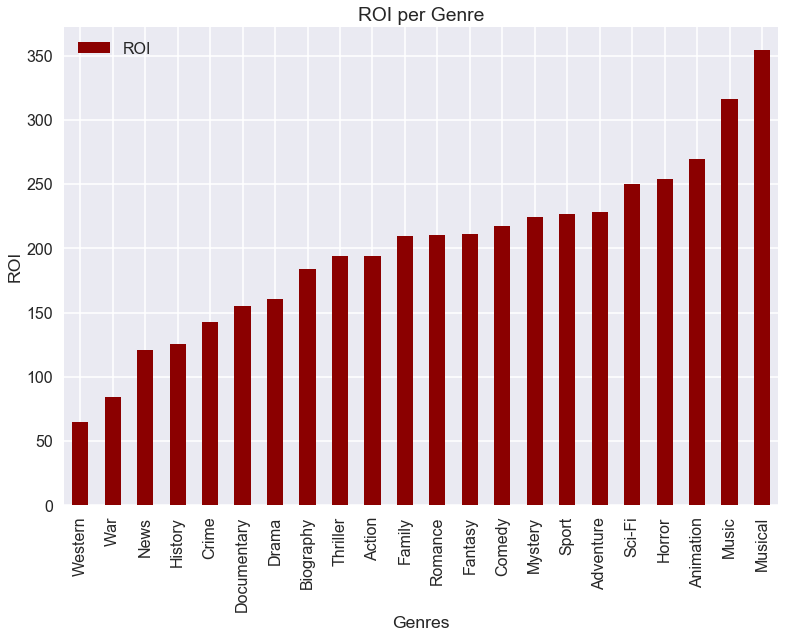

In [40]:
plt.style.use('seaborn-poster')

average_df.plot.bar(y='ROI',color='#8b0000', title='ROI per Genre', \
                    ylabel='ROI', xlabel='Genres');

Looking at this result I have decided to combine Musical and Music as a genre because of their similarities and also because there might have been some imprecision in which the movie genres were assigned, since their figures are so similar.
I also made this choice to include in our study the Adventure genre, which I think is a very valuable one for Microsoft, as I will explain later.

So all this said:
We discovered that the top five genres with higest return on investment are Musical, Animation, Horror, Sci-Fi and Adventure.

Now let's calculate the ROI for the top 5 genres and for all the other genres together.

In [41]:
"""selecting the last 6 genres,
since I'm grouping Music and Musical"""
top5=(average_df['ROI'].iloc[-6:]).mean() 
roi_top5=round(top5,3)
rest=(average_df['ROI'].iloc[0:-6]).mean() # all the rest of the genres
roi_rest=round(rest,3)

In [42]:
print('ROI for the top 5 genres is:',roi_top5,"\nROI for the rest of the genres is:",roi_rest)

ROI for the top 5 genres is: 278.874 
ROI for the rest of the genres is: 170.308


In [63]:
plt.style.use('seaborn-poster')

This is a remarkable result, as the return on investment in the genres that we identified is **1.6 times** than for the other genres!

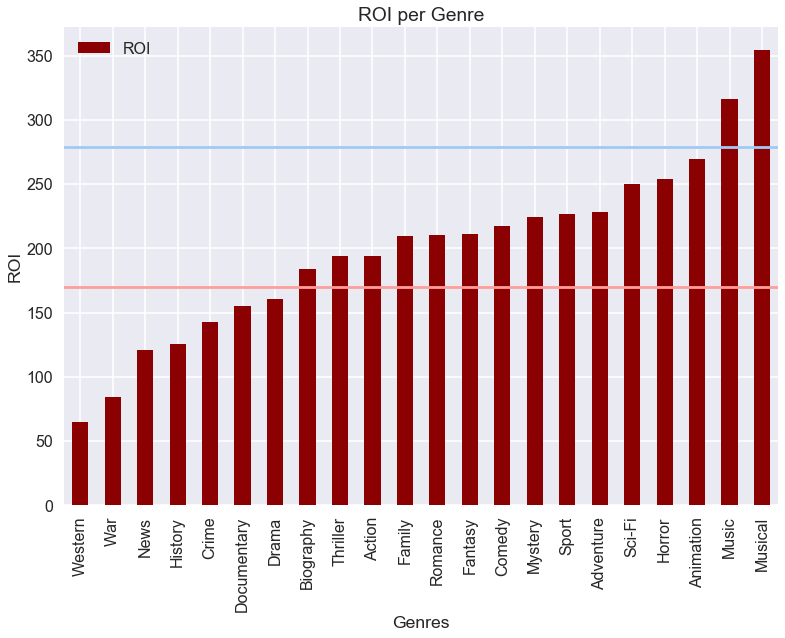

In [64]:
average_df.plot.bar(y='ROI',color='#8b0000', title='ROI per Genre', \
                    ylabel='ROI', xlabel='Genres');
plt.axhline(y = roi_top5, color = 'b', linestyle = '-') 
plt.axhline(y = roi_rest, color = 'r', linestyle = '-');

## Now the question is: what makes a movie profitable?
Let us study other things that could possibly be connected to a movie being profitable in order to see what other parameters might be key to take into consideration.

In [45]:
top5_genres=['Animation','Adventure', 'Sci-Fi','Horror','Musical', 'Music'] # combining the genres musical and music
top5_df=main_df[main_df.genres.isin(top5_genres) == True]
all_the_rest=main_df[main_df.genres.isin(top5_genres) == False]

### People that a movie is 'known for'
First, I considered the number of people that a movie is known for to see if there is any correlation with the movie gross income.
To calculate this we retrieve some of the DataFrames that we created before.

In [46]:
top5_df.drop_duplicates(subset=['movie'], inplace=True)
first_df=pd.merge(top5_df, knownfor_df, on='movie_id',how='inner')
people_df=pd.merge(first_df, persons_df, on='person_id', how='inner')
people_df.drop(columns=['production_budget', 'domestic_gross','domestic_net','worldwide_net','start_year',\
                            'primary_title','original_title','runtime_minutes','genres_y','death_year'], inplace=True)
counting=people_df.groupby('movie').count() # counting number of people "known_for" in each movie
counting=counting.reset_index()
famous_counts= pd.DataFrame().assign(movie=counting['movie'],counts=counting['id'])

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
top5_fam=famous_counts.merge(top5_df,on='movie',how='inner')
top5_fam=top5_fam.sort_values(by='counts')
#top5_fam.drop_duplicates(subset=['movie'], inplace=True)

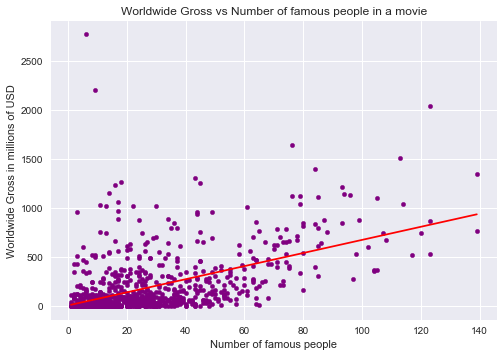

In [48]:
ax=top5_fam.plot.scatter(x='counts',y='worldwide_gross',color="#800080")
ax.set_title("Worldwide Gross vs Number of famous people in a movie")
ax.set_xlabel("Number of famous people")
ax.set_ylabel("Worldwide Gross in millions of USD")
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'], \
                    top5_fam['worldwide_gross'], 1))(np.unique(top5_fam['counts'])), color='red');

In [49]:
#code for correlation from https://dev.to/shanelee/how-to-plot-a-correlation-with-python-python-for-statistics-5ef

It looks like there is a positive correlation between number of famous people in a movie and worldwide gross income.
Here I calculated it to be able to quantify.

In [50]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['worldwide_gross'])
print('Correlation: ',correlation_matrix[0][1])

Correlation:  0.5306527988979541


The correlation is a normalized value which means that it spans between 1 and 0. 
A 0.5 correlation is considered a moderate positive one.

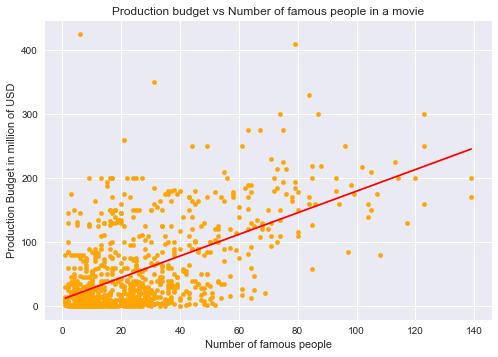

In [51]:
ax=top5_fam.plot.scatter(x='counts',y='production_budget',color='#FFA500')
ax.set_title("Production budget vs Number of famous people in a movie")
ax.set_xlabel("Number of famous people")
ax.set_ylabel("Production Budget in million of USD")
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'],\
                    top5_fam['production_budget'], 1))(np.unique(top5_fam['counts'])), color='red');

There is also a correlation between number of famous people in a movie and budget, let's see how much it is exactly:

In [52]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['production_budget'])
print('Correlation: ',correlation_matrix[0][1])

Correlation:  0.589735062270879


Also the correlation between budget and number of people is positive and around 50%, it is to be expected...

### When to release?
One more element that was worthy of investigation and to be taken into account in trying to produce the most profitable movies is the best time of the year to release a movie.
***
The only file that contains the release date is the one from The Movie Database so I'm going to pull that one up and merge it with the file from The Numbers:

In [53]:
release_df=pd.merge(df_tn,df_tmdb,left_on='movie',right_on='title',how='inner')
release_df.drop(columns=['Unnamed: 0','genre_ids','id_y','original_language','release_date_y','title'],inplace=True)

In [54]:
""" This method returns the months in numbers. """
release_df['month'] = pd.DatetimeIndex(release_df['release_date_x']).month # 
release_df=release_df.groupby('month').mean()
release_df.reset_index(inplace=True)
release_df.sort_values(by='month',inplace=True)
import calendar
""" I can apply this to turn the months from numbers into abbreviations on the 
month names which is better for the graph. """
release_df['month'] = release_df['month'].apply(lambda x: calendar.month_abbr[x])

#code adapted from EoinS https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

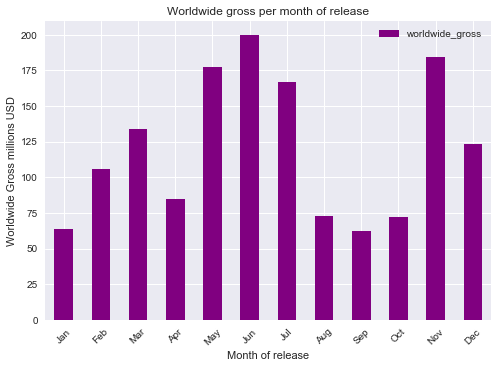

In [55]:
plt.style.use('seaborn-notebook')
release_df.plot.bar(x='month',y='worldwide_gross',color='#800080',rot=45, xlabel='Month of release',\
                    ylabel='Worldwide Gross millions USD', title='Worldwide gross per month of release');

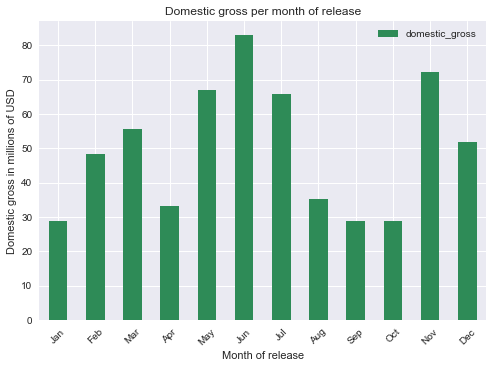

In [56]:
release_df.plot.bar(x='month',y='domestic_gross',color='#2E8B57',rot=45, xlabel='Month of release',\
                    ylabel='Domestic gross in millions of USD', title='Domestic gross per month of release');

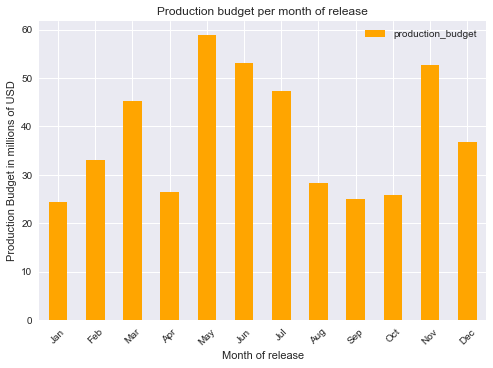

In [57]:
release_df.plot.bar(x='month',y='production_budget',color='#FFA500',rot=45, xlabel='Month of release',\
                    ylabel='Production Budget in millions of USD', title='Production budget per month of release');

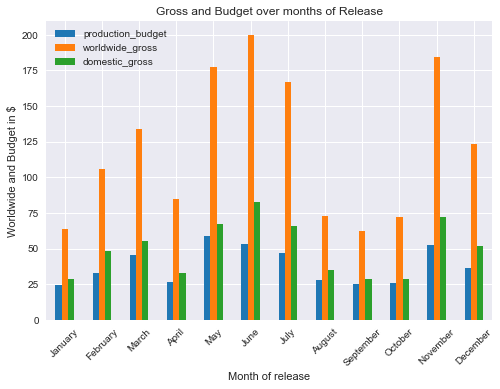

In [58]:
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
df=pd.DataFrame({'production_budget': release_df['production_budget'],
                 'worldwide_gross': release_df['worldwide_gross'],\
                 'domestic_gross':release_df['domestic_gross']
                }, index=release_df['month'].index)
ax=df.plot.bar(rot=45)
ax.set_title('Gross and Budget over months of Release')
ax.set_xlabel('Month of release')
ax.set_ylabel('Worldwide and Budget in $')
ax.set_xticklabels(labels);

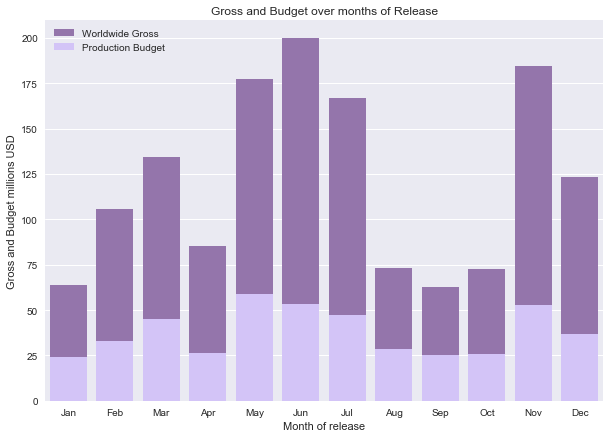

In [59]:
plt.style.use('seaborn-notebook')
f,ax = plt.subplots(figsize=(10,7))

sns.set_color_codes("muted")
sns.barplot(x="month", y="worldwide_gross", data=release_df,
            label="Worldwide Gross", color="m")

sns.set_color_codes("pastel")
sns.barplot(x="month", y="production_budget", data=release_df,
            label="Production Budget", color="m")

ax.legend(ncol=1, loc="upper left", frameon=False)
ax.set(ylabel="Gross and Budget millions USD",
       xlabel="Month of release")
ax.set_title('Gross and Budget over months of Release');


The data demonstrated the seasons in which the profit is the highest are the summer and the fall. In particular the months in which the gross income is highest are June and November. This trend is also related to the budgets, as we can observe lower budget movies are usually being released during the less profitable months. It is logical to wait for the most profitable months to release a high budget blockbuster movie, instead of risking a lower return by releasing it during months in which people don't seem to go to the movies as much.

### A few numbers to keep in mind...
Let us do one final calculation to see what we can expect on average for domestic gross, worldwide gross and production budget across all the movies and only in our top 5 genres. First let us drop the outliers from both DataFrames that would heavily influence our calculations.

In [60]:
"""Removing outliers in the main database """
Q3=np.percentile(main_df['production_budget'],75)
Q1=np.percentile(main_df['production_budget'],25)
IQR=main_df
IQR.drop(IQR.index[IQR['production_budget']>Q3], inplace=True)
IQR.drop(IQR.index[IQR['production_budget']<Q1], inplace=True)

In [61]:
top5_genres=['Animation','Adventure', 'Sci-Fi','Horror','Musical', 'Music'] # combining the genres musical and music
top5_df=main_df[main_df.genres.isin(top5_genres) == True]
all_the_rest=main_df[main_df.genres.isin(top5_genres) == False]

In [62]:
from colorama import Fore
from colorama import Style

"""Calculating the mean of budget, domestic gross and worldwide gross and presenting results."""
allrest_budget=round(all_the_rest['production_budget'].mean(),2)
top5_budget=round(top5_df['production_budget'].mean(),2)
allrest_domgross=round(all_the_rest['domestic_gross'].mean(),2)
top5_domgross=round(top5_df['domestic_gross'].mean(),2)
allrest_worldgross=round(all_the_rest['worldwide_gross'].mean(),2)
top5_worldgross=round(top5_df['worldwide_gross'].mean(),2)

print(f"The average {Fore.RED}budget{Style.RESET_ALL} that we can expect for a movie from our top five genres is:\n",\
      top5_budget,"in millions of USD \n while the average budget for a movie from the other genres is:\n"\
      ,allrest_budget,"in millions of USD\n")
print(f"The average {Fore.BLUE}domestic gross{Style.RESET_ALL} that we can expect for a movie from our top five genres is:\n",\
      top5_domgross,"in millions of USD \n while the average domestic gross for a movie from the other genres is:\n"\
      ,allrest_domgross,"in millions of USD\n")
print(f"The average {Fore.GREEN}worldwide gross{Style.RESET_ALL} that we can expect for a movie from our top five genres is:\n",\
      top5_worldgross,"in millions of USD \n while the average worldwide gross for a movie from the other genres is:\n"\
      ,allrest_worldgross,"in millions of USD\n")

#code from JayRizzo on https://stackoverflow.com/questions/287871/how-do-i-print-colored-text-to-the-terminal

The average budget that we can expect for a movie from our top five genres is:
 20.43 in millions of USD 
 while the average budget for a movie from the other genres is:
 20.17 in millions of USD

The average domestic gross that we can expect for a movie from our top five genres is:
 31.73 in millions of USD 
 while the average domestic gross for a movie from the other genres is:
 29.33 in millions of USD

The average worldwide gross that we can expect for a movie from our top five genres is:
 63.06 in millions of USD 
 while the average worldwide gross for a movie from the other genres is:
 55.56 in millions of USD



Taking into account the results from the data, I would strongly recommend producing movies from the five genres that we identified, considering that they have an overall similar budget compared to the average, and yet they have higher values for both worldwide gross and domestic gross.

## Evaluation
I think that by looking at the data it is clear that there isn't a standard recipe to produce a very profitable movie as there are countless complex factors at play and ultimately even investing in a higher budget movie does not guarantee a proportional result in gross profit.

With this premise, the top five genres identified show a return on investment that is **1.6 times** compared to the rest of the movies.

The presence of famous people in the movie did tend to increase the chances of a higher income, but is also not a guarantee.

The time of release seems to be very consistent, and must be taken into account when deciding at what time to release a movie.

The data shows that on average producing a movie in the five top genres that I indicated with the same budget provides a higher gross, both worldwide and domestically.

## Conclusions

* The study on genre revealed five genres that are roughly twice as profitable as the rest of the genres.
* Microsoft should focus on specific genres (Musical, Animation, Horror, Sci-Fi and Adventure) to achieve highest profitability. 
* Microsoft should also take into consideration what it already is familiar with - the video game industry. Among these genres, animation, adventure and science fiction can be perfect candidates for Microsoft to create video games based on the movies.
* When a higher budget is available, Microsoft should consider investing it in having famous writers, directors and actors in their movies, as this tends to increase the gross.
* In deciding when to release a movie, the higher budget movies should be released in the summer and fall months, in particular July and November. 

### For future consideration:

* To deepen this proposal it would be critical to also study marketing as part of the budget, to have a more precise sense of the profit of the movies. Taking into consideration the impact that the internet and cell phones have had on marketing, exposure to movies has radically changed in the past 10-20 years and should be taken into account.
* Inflation is another factor that should be considered when calculating and comparing monetary values over different years and decades.
* A further inquiry into the months for movie releases separated by genre could also be helpful to decide more specifically when to release which movie.
* Separating data according to smaller intervals is also key as genres of movies could be changing in popularity as compared to several years ago (for example, the dominance of superhero movies). 
